# NOTEBOOK

# BUSINESS UNDERSTANDING
Ini adalah tahap pertama dalam CRISP-DM dan termasuk bagian yang cukup vital. Pada tahap ini membutuhkan pengetahuan dari objek bisnis, bagaimana membangun atau mendapatkan data, dan bagaimana untuk mencocokan tujuan pemodelan untuk tujuan bisnis sehingga model terbaik dapat dibangun. Kegiatan yang dilakukan antara lain: menentukan tujuan dan persyaratan dengan jelas secara keseluruhan, menerjemahkan tujuan tersebut serta menentukan pembatasan dalam perumusan masalah data mining, dan selanjutnya mempersiapkan strategi awal untuk mencapai tujuan tersebut.

Handphone merupakan alat telekomunikasi elektronik bersifat dua arah yang mudah untuk kita bawa kemana-mana dan mempunyai kemampuan untuk bisa mengirim pesan baik berupa suara, gambar dan informasi. Pengertian handphone tersebut adalah pengertian handphone secara dasar. Dalam keseharian saat ini, manusia tentu saja hampir tidak dapat lepas dari yang namanya Handphone. Apalagi sekarang dengan semakin berkembangnya teknologi sehingga membuat handphone memiliki berbagai manfaat dan kegunaan sekaligus. Tidak hanya digunakan untuk alat komunikasi. Namun sekarang handphone juga bisa digunakan untuk media hiburan, untuk bisnis dan juga bisa digunakan untuk berbagai kegunaan lainnya. Bahkan saat ini istilah handphone berubah menjadi smartphone karena memiliki berbagai macam kegunaan dan juga fungsi pintar yang bisa memudahkan segala urusan manusia.

Tujuan dari pemodelan ini adalah agar dapat memprediksi harga HP menggunakan dataset yang telah didapat. Kemudian dataset yang telah didapat disesuaikan dengan model sehingga dapat di implementasikan ke model untuk mendapat skor nilai akhir yang diinginkan yaitu estimasi harga HP. Dataset dapat diambil dari situs-situs yang menyediakan dataset yang kita inginkan, salah satu situsnya yaitu kaggle.
Saya sendiri mengambil dataset dari situs kaggle tersebut. alamat link dataset ini ialah : https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction?select=Cellphone.csv 

# DATA UNDERSTANDING
Secara garis besar untuk memeriksa data, sehingga dapat mengidentifikasi masalah dalam data. Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data. Tahap ini juga harus dilakukan secara cermat dan tidak terburu-buru, seperti pada visualisasi data, yang terkadang insight-nya sangat sulit didapat Jika dihubungkan dengan summary data nya. Jika ada masalah pada tahap ini yang belum terjawab, maka akan menggangu pada tahap modeling.

Dari dataset yang dipakai didapat variabel seperti yang tergambar pada df.info() pada tahap DATA PREPARATION yaitu:
  
1.   Product_id    = Id Produk -> int  

2.  Price         = Harga -> int

3.  Sale          = Nomer Penjualan -> int  

4.  weight        = Berat (gr) -> float

5.  resoloution   = Resolusi -> float

6.   ppi           = Piksel -> int  

7.   cpu_core      = CPU Core -> int  

8.   cpu_freq      = Frekuensi CPU (GHz) -> float

9.   internal_mem  = Memori Internal (GB) -> float

10.  ram           = RAM (GB) -> float

11.  RearCam       = Kamera Belakang (MP) -> ifloat

12.  Front_Cam     = Kamera Depan (MP) -> float

13.  battery       = Kapasitas Baterai (mAH) -> int  
 
14.  thickness     = Ketebalan (inch) -> float



# deskripsi library yang digunakan

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# memanggil dataset

In [73]:
df = pd.read_csv('Cellphone.csv')

# deskripsi dataset

In [74]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# DATA PREPARATION
Secara garis besar untuk memperbaiki masalah dalam data, kemudian membuat variabel derived. Tahap ini jelas membutuhkan pemikiran yang cukup matang dan usaha yang cukup tinggi untuk memastikan data tepat untuk algoritma yang digunakan. variabel yang digunakan dalam inputan adalah 'weight', 'thickness', 'ram', 'internal_mem', 'cpu_core', 'cpu_freq', 'RearCam', 'Front_Cam', 'ppi',  'battery' Sebagai nilai akhirnya yaitu 'Price'.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu_core      161 non-null    int64  
 7   cpu_freq      161 non-null    float64
 8   internal_mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


<Axes: >

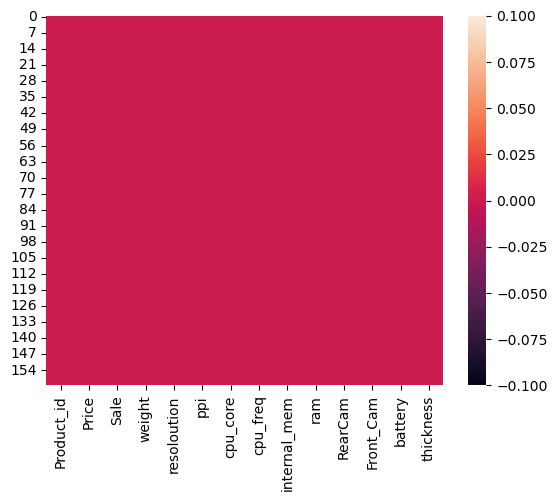

In [76]:
sns.heatmap(df.isnull())

In [77]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


# visualisasi data

<Axes: >

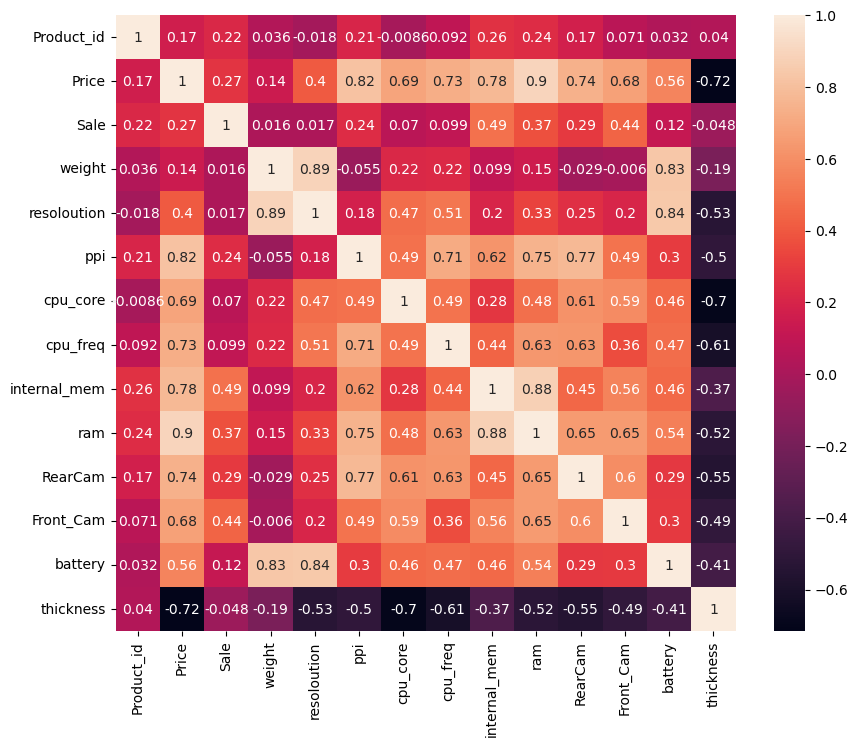

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah HP Berdasarkan ID Produk

In [83]:
ID_Produk = df.groupby('Product_id').count()[['Price']].sort_values(by='Price',ascending=True).reset_index()
ID_Produk = ID_Produk.rename(columns={'Price':'Jumlah_HP'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 [Text(0, 0, '10'),
  Text(1, 0, '14'),
  Text(2, 0, '30'),
  Text(3, 0, '32'),
  Text(4, 0, '40'),
  Text(5, 0, '43'),
  Text(6, 0, '56'),
  Text(7, 0, '64'),
  Text(8, 0, '66'),
  Text(9, 0, '93'),
  Text(10, 0, '99'),
  Text(11, 0, '104'),
  Text(12, 0, '131'),
  Text(13, 0, '133'),
  Text(14, 0, '143'),
  Text(15, 0, '162'),
  Text(16, 0, '183'),
  Text(17, 0, '187'),
  Text(18, 0, '198'),
  Text(19, 0, '203'),
  Text(20, 0, '218'),
  Text(21, 0, '237'),
  Text(22, 0, '289'),
  Text(23, 0, '290'),
  Text(24, 0, '301'),
  Text(25, 0, '315'),
  Text(26, 0, '377'),
  Text(27, 0, '409'),
  Text(28, 0, '460'),
  Text(29

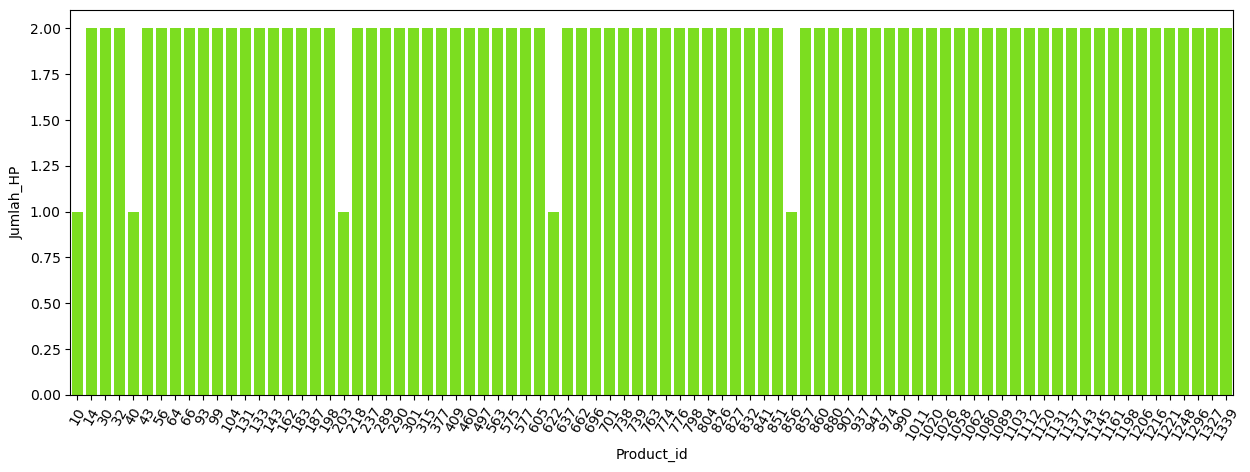

In [84]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=ID_Produk['Product_id'], y=ID_Produk['Jumlah_HP'], color='lawngreen')
plt.xticks(rotation=60)

# Jumlah HP Berdasarkan Memori Internal

In [85]:
Memori_Internal = df.groupby('internal_mem').count()[['Price']].sort_values(by='Price').reset_index()
Memori_Internal = Memori_Internal.rename(columns={'Price':'Jumlah_HP'})

<Axes: xlabel='internal_mem', ylabel='Jumlah_HP'>

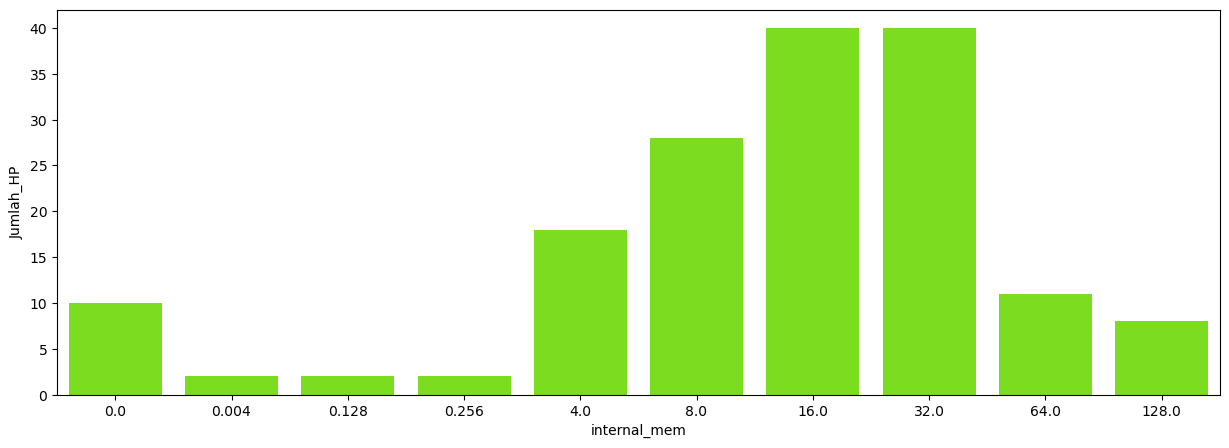

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(x=Memori_Internal['internal_mem'], y=Memori_Internal['Jumlah_HP'], color='lawngreen')

# Jumlah HP Berdasarkan RAM

In [87]:
ram = df.groupby('ram').count()[['Price']].sort_values(by='Price').reset_index()
ram = ram.rename(columns={'Price':'Jumlah_HP'})

<Axes: xlabel='ram', ylabel='Jumlah_HP'>

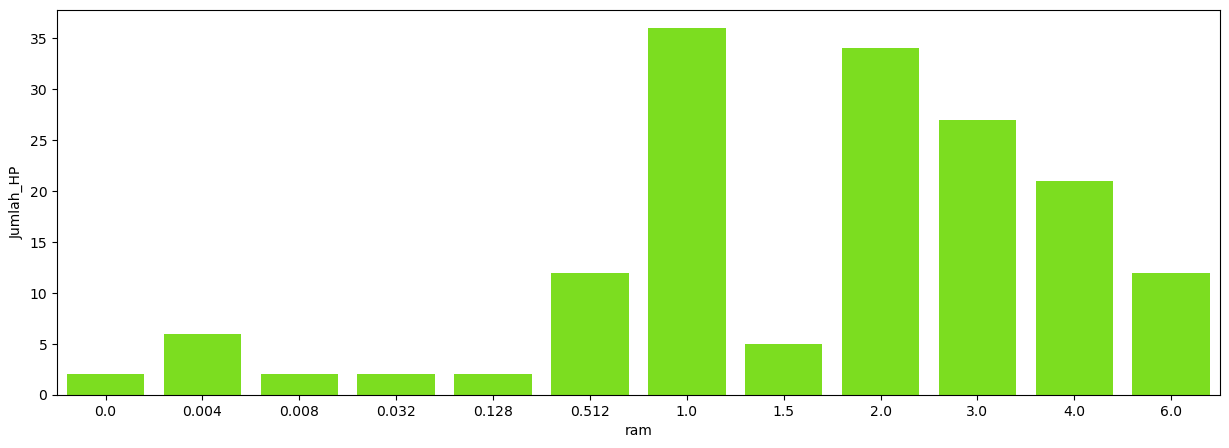

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(x=ram['ram'], y=ram['Jumlah_HP'], color='lawngreen')

# Distribusi Harga HP

C:\Users\user\AppData\Local\Temp\ipykernel_296\494673643.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], color='lawngreen')


<Axes: xlabel='Price', ylabel='Density'>

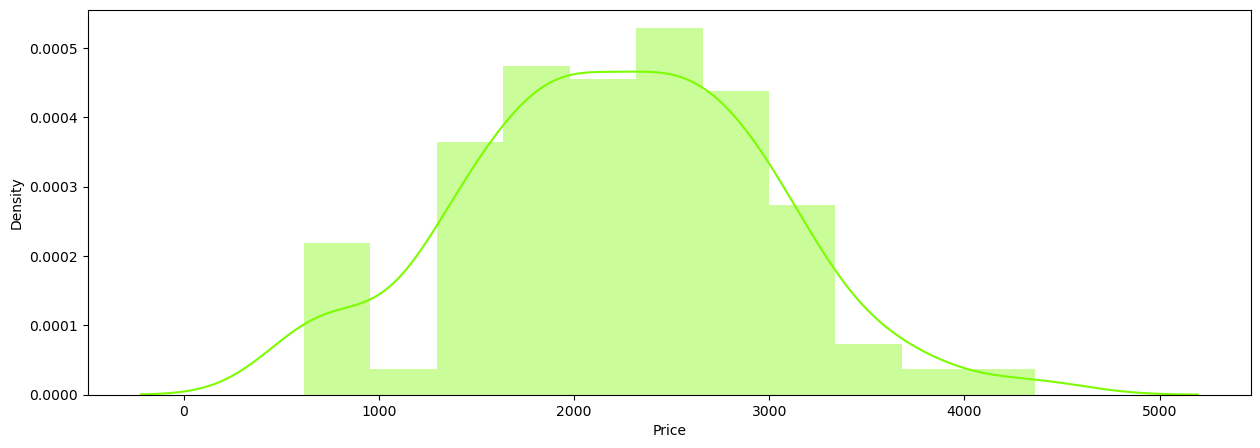

In [91]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price'], color='lawngreen')

# MODELING
Secara garis besar untuk membuat model prediktif atau deskriptif. Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining, alat bantu data mining, dan algoritma data mining yang akan diterapkan. Lalu selanjutnya adalah melakukan penerapan teknik dan algoritma data mining tersebut kepada data dengan bantuan alat bantu. Jika diperlukan penyesuaian data terhadap teknik data mining tertentu, dapat kembali ke tahap data preparation.

# seleksi fitur

In [92]:
features = ['weight', 'thickness', 'ram', 'internal_mem', 'cpu_core', 'cpu_freq', 'RearCam', 'Front_Cam', 'ppi', 'battery']
x = df[features]
y = df['Price']
x.shape, y.shape

((161, 10), (161,))

# split data training dan data testing

In [93]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(41,)

# EVALLUATION
Melakukan interpretasi terhadap hasil dari data mining yang dihasilkan dalam proses pemodelan pada tahap sebelumnya. Evaluasi dilakukan terhadap model yang diterapkan pada tahap sebelumnya dengan tujuan agar model yang ditentukan dapat sesuai dengan tujuan yang ingin dicapai dalam tahap pertama.

# membuat model regresi linier

In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [95]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9344355653291851


# DEPLOYMENT
Tahap deployment atau rencana penggunaan model adalah tahap yang paling dihargai dari proses CRISP-DM. Perencanaan untuk Deployment dimulai selama Business Understanding dan harus menggabungkan tidak hanya bagaimana untuk menghasilkan nilai model, tetapi juga bagaimana mengkonversi skor keputusan, dan bagaimana untuk menggabungkan keputusan dalam sistem operasional.

# membuat inputan model regresi linier

In [101]:
#'weight:66', 'thickness:5.1', 'ram:2', 'internal_mem:8', 'cpu_core:4', 'cpu_freq:1.3', 'RearCam:8', 'Front_Cam:2', 'ppi:258', 'battery:2390'
input_data = np.array([[66, 5.1, 2, 8, 4, 1.3, 8, 2, 258, 2390]])

prediction = lr.predict(input_data)
print('Jadi Estimasi Harga HP :', prediction, 'Rupiah (IDR):', prediction*0.35)

Jadi Estimasi Harga HP : [2338.92138017] Rupiah (IDR): [818.62248306]


c:\user\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [98]:
import pickle

filename = 'estimasi_harga_hp.sav'
pickle.dump(lr,open(filename,'wb'))